# Week 2
## Question 1: Dataset Exploration

In this task, we analyze a dataset with information about the sales of gas stations across a city, using `pandas` and `matplotlib`. Afterward, we use the SimpleLinearRegression model from last week's exercise to predict the price.

First, we import `pandas` for handling the data, `matplotlib.pyplot` for visualizing the data and `models.SimpleLinearRegression` for the linear regression model.

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from models import SimpleLinearRegression

We load the data using pandas and determine each numeric field.

In [68]:
df = pd.read_csv('GasPrices.csv')
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns

Index(['Unnamed: 0', 'ID', 'Price', 'Pumps', 'Gasolines', 'Zipcode', 'Income'], dtype='object')

### Summarization of numeric fields

In [69]:
print(df['Unnamed: 0'])

0        1
1        2
2        3
3        4
4        5
      ... 
96      97
97      98
98      99
99     100
100    101
Name: Unnamed: 0, Length: 101, dtype: int64


Analyzing the column 'Unnamed: 0' does not make any sense, because it behaves like an ID column with consecutive Integers, starting with 0 up to 101.

In [70]:
print(df['ID'])

0        1
1        2
2        3
3        4
4        5
      ... 
96      97
97      98
98      99
99     100
100    101
Name: ID, Length: 101, dtype: int64


Analyzing the 'ID' column also does not make sense, since this is the same as the 'Unnamed: 0' column. This makes the 'Unnamed: 0' column redundant. For calculating statistics, the 'ID' column is also redundant (could be used for identifying records across datasets).

In [71]:
print(df['Price'].describe())

count    101.000000
mean       1.864257
std        0.081515
min        1.730000
25%        1.790000
50%        1.850000
75%        1.920000
max        2.090000
Name: Price, dtype: float64


`DataFrame.describe` provides the relevant statistics for the price. It ranges from 1.73 to 2.09, with an average gas price of approximately 1.86. The standard deviation is relatively low at 0.0815, indicating that the prices do not vary substantially. However, without knowing the specific types of gas sold at each station (e.g., super, diesel), it's challenging to interpret these numbers.

In [72]:
print(df['Pumps'].describe())
pumps_mode = df['Pumps'].mode()[0]

print(f'Pumps mode: {pumps_mode}')

count    101.000000
mean       6.950495
std        3.925242
min        2.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       24.000000
Name: Pumps, dtype: float64
Pumps mode: 4


The number of pumps available at each station ranges from 2 to 24, with an average of approximately 6.95 pumps per station. Using `DataFrame.mode`, we see that the most common amount of pumps is 4. With a standard variation of 3.93, we have quite some variation in the amount of pumps across gas stations.

In [73]:
print(df['Gasolines'].describe())

gasolines_mode = df['Gasolines'].mode()[0]
print(f'Gasolines mode: {gasolines_mode}')

count    101.000000
mean       3.465347
std        0.557931
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Gasolines, dtype: float64
Gasolines mode: 3


The number of gasoline types available at each station ranges from 1 to 4, with an average of approximately 3.47 types per station. We see that stations with 3 types of gasoline are the most comon. With a standard deviation of 0.56, the variation in the number of gasoline types is relatively small.


In [74]:
zipcode_min = df['Zipcode'].min()
zipcode_max = df['Zipcode'].max()
zipcode_mode = df['Zipcode'].mode()[0]

print(f'Zipcode range: {zipcode_min} - {zipcode_max}\nZipcode mode: {zipcode_mode}')

Zipcode range: 78701 - 78759
Zipcode mode: 78702


The zipcodes range from 78201 to 78759, wich are likely postcodes from Austin, Texas. According to the data, the most gas stations are in the district of East Austin (78702).

In [75]:
print(df['Income'].describe())

income_median = df['Income'].median()
print(f'Income median: {income_median}')

count       101.000000
mean      56727.217822
std       25868.359804
min       12786.000000
25%       37690.000000
50%       52306.000000
75%       70095.000000
max      128556.000000
Name: Income, dtype: float64
Income median: 52306.0


The income ranges from 12,786 to 128,556. The average is about 56,727, and the median is 52,306. With a standard deviation of 25,868, there's a lot of variation in the incomes, which is pretty much what you would expect for income distribution in the USA.


### Grouped Analysis

In [76]:
grouped = df.groupby('Name')

grouped_df = grouped['Price'].mean().to_frame(name='Average_Price')
grouped_df['Average_Income'] = grouped['Income'].mean()
grouped_df['Average_Pumps'] = grouped['Pumps'].mean()
grouped_df

,Average_Price,Average_Income,Average_Pumps
Name,,,
7-Eleven,1.887778,53432.333333,4.666667
Around the Corner Store,1.940000,63750.000000,2.000000
Chevron,1.871818,61754.636364,8.727273
Citgo,1.835000,49387.000000,4.000000
Conoco,1.890000,43545.500000,4.000000
Costco,1.730000,70095.000000,12.000000
Double R Grocery,1.790000,37690.000000,4.000000
East 1st Grocery,1.770000,37690.000000,4.000000
Exxon,1.855000,52344.333333,11.500000


### Boxplot Analysis

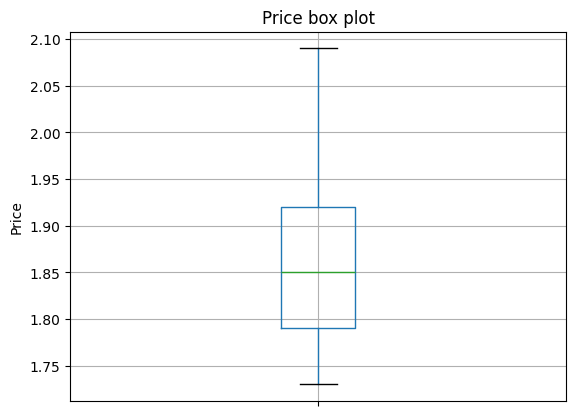

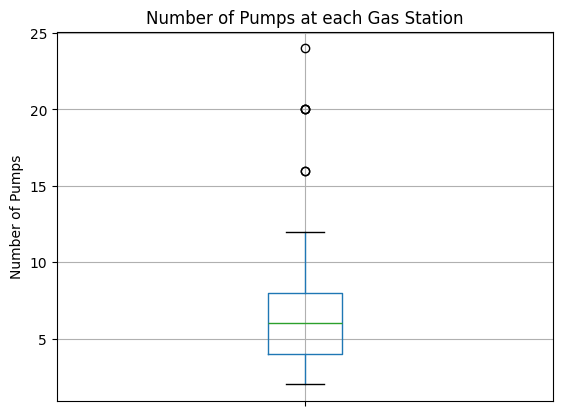

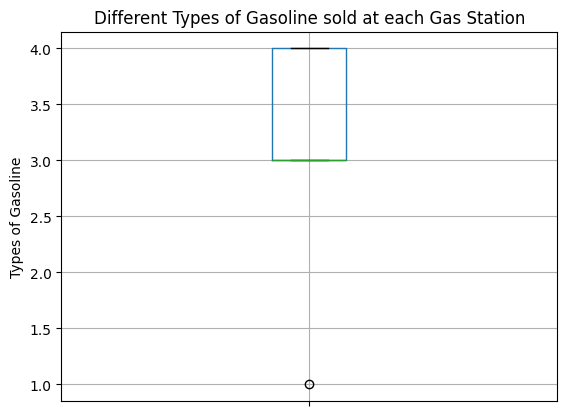

In [77]:
box = df.boxplot(column='Price')
box.set_xticklabels([''])
plt.ylabel('Price')
plt.title('Price box plot')
plt.show()
plt.close()

box = df.boxplot(column='Pumps')
box.set_xticklabels([''])
plt.ylabel('Number of Pumps')
plt.title('Number of Pumps at each Gas Station')
plt.show()
plt.close()

box = df.boxplot(column='Gasolines')
box.set_xticklabels([''])
plt.ylabel('Types of Gasoline')
plt.title('Different Types of Gasoline sold at each Gas Station')
plt.show()
plt.close()


### Price Prediction

We use the `models.SimpleLinearRegression` for the linear regression. This is the exact model from Week 1.

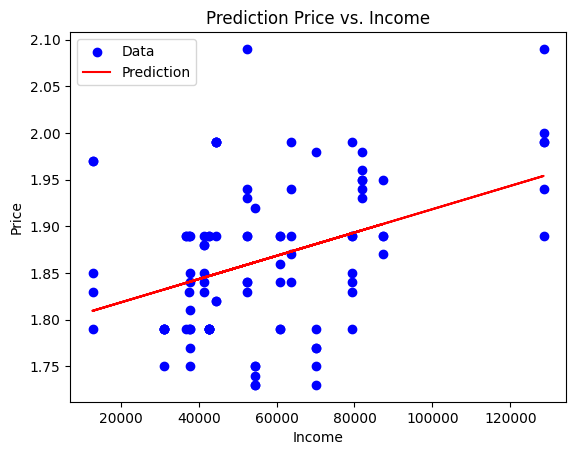

In [78]:
def plot_regression(normalize=False):
    """
    Plots the linear regression price vs. income using the SimpleLinearRegression model.
    :param normalize: normalize income
    :return: None
    """
    x = df['Income'].values
    y = df['Price'].values

    if normalize:
        max_income = x.max()
        x = x / max_income

    model = SimpleLinearRegression()
    model.fit(x, y)

    predictions = model.predict(x)

    plt.scatter(x, y, color='blue', label='Data')
    plt.plot(x, predictions, color='red', label='Prediction')
    plt.xlabel('Income')
    plt.ylabel('Price')
    plt.legend()
    if normalize:
        plt.title('Prediction Price vs. Normalized Income')
    else:
        plt.title('Prediction Price vs. Income')
    plt.show()
    plt.close()


plot_regression(normalize=False)


The Linear Regression suggests, that in areas with greater income, the gas price is also higher.

Now, we plot the line with normalized income.

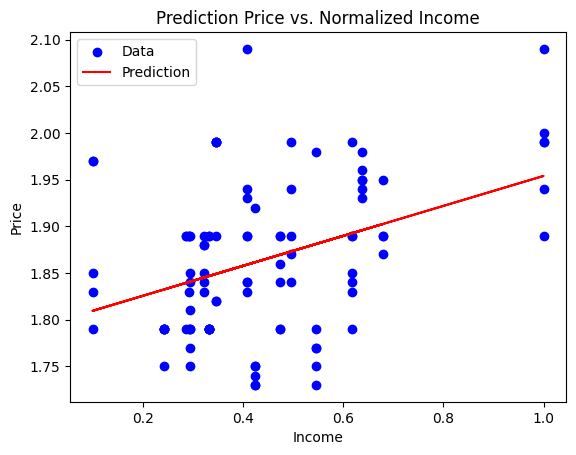

In [79]:
plot_regression(normalize=True)

The prediction with normalization rescales the income between 0 and 1. It does not change the predictions, but just adjusts the scale. This could make comparisons more consistent when compared to more data.